# Projeto de ICD - Dota 2

#### Alunos:
    Gabriel Henrique
    Matheus Vargas
    Raydan Gaspar

1. Definir Tema e grupo. (2pts) ✔️
2. Discussão com Monitores. (3pts) ✔️
3. Relatório Final. Entregue um relatório sobre os resultados que você levantou para responder às suas perguntas. Sua análise dos dados devem apresentar:
    * Uma caracterização (análise exploratória) inicial dos dados (2pts)✔️
    * Pelo menos, dois testes de hipótese/intervalos de confiança (2pts)✔️
        * Os ICs podem ser apresentados nos resultados de regressão e classificação abaixo.
        * Os testes de hipótese também podem ser utilizados abaixo para comparar modelos.
    * Pelo menos uma regressão (3pts)✔️
    * Pelo menos um algoritmo de aprendizado/classificação (3pts)
4. No seu relatório, você deve apresentar pelo menos os seguintes pontos:
 * Introdução com Motivação e Pergunta de Pesquisa
 * Metodologia
 * Descreva sua base✔️
 * Quais métodos e modelos foram utilizados. Justifique os mesmos.
5. Resultados. Sugiro separar em
 * Caracterização (análise exploratória)
     * Testes de hipótese podem vir aqui.
 * Previsão (uma ou duas sub-seções dependendo dos modelos utilizados)
6. Conclusões
 * Responda sua pergunta pelo menos de forma evidencial.
7. Vídeo no Youtube 5 minutos. Pode ser um vídeo só dos slides!! Com as falas, claro. 5pts.

# Introdução

![](img/dota_logo.png)

# Tema

Dota 2 é um jogo eletrônico do gênero Multiplayer Online Battle Arena (MOBA, "arena de batalha multijogador online"), também conhecido como Action Real-Time Strategy (ARTS, "estratégia de ação em tempo real") onde o jogador controla um personagem em uma batalha entre dois times, cujo objetivo é derrotar a equipe adversária e, para isso, é, indispensavelmente, necessário destruir o Ancestral (Ancient), que, por sua vez, se localiza no centro da base inimiga. Cada base é defendida por torres e ondas de unidades (chamadas de creeps) que percorrem os caminhos principais do mapa (chamadas de trilhas, ou lanes) que levam à suas bases. Existem 3 trilhas no mapa do jogo, que por convenção são chamadas de trilha de cima (Top, atravessa a parte de cima do mapa), trilha do meio (Mid ou Middle, caminho que atravessa o centro do mapa) e trilha de baixo (Bot ou Bottom, caminho que atravessa a parte de baixo do mapa). 

Na imagem abaixo podemos ver o minimapa do Dota2 e ao lado um diagrama representando o layout de um jogo do gênero MOBA, onde os pontos roxos e rosas representam as torres de cada time, com exceção do maior ponto localizado nos cantos da imagem dentro de cada base, que representa o Ancient.

| ![](img/minimaps.png)|
|:--:| 
| **Figura 1**: Minimapa do Dota 2 (esquerda) e layout padrão de jogos MOBA (direita) |


## Motivação

Afim de colocar em prática os assuntos desenvolvidos em sala, o netebook a seguir busca extrair da base de dados, informações relevantes para o entendimento da mecânica de jogo e mensuração de estatíscas sobre as partidas.

## Pergunta de Pesquisa

O que define uma partida de dota?

# Descrição da base
Os dados foram coletados utilizando a API não oficial do jogo, chamada OpenDoTA, nela coletamos dados de várias partidas do ano de 2015, assim como os dados dos jogadores presentes em cada partida e todas as suas ações, como por exemplo as coordenadas das posições que o jogador passou durante a partida, o herói que escolheu, quantas vezes morreu, entre outros. Nós optamos por utilizar os mesmos dados que usamos no trbalho final de Introdução a Banco de dados, mas os dados coletados foram disponibilizados em formato json, e não em formato de tabelas como precisávamos, então foi preciso selecionar os dados que queríamos entre aqueles fornecidos pela API e montar um banco de dados a partir deles. 

Uma característica do formato json é usar o tipo abstrato de dados dicionário, que é composto de pares de chaves e valores, onde cada chave pode conter uma lista de outras chaves e seus valores, isso faz com que existam várias "sub-tabelas" nos dados, o que impossibilita a importação dos dados diretamente para um banco de dados convencional. Dessa forma, foram criadas tabelas separadas para cada conjunto de valores do json, sendo que cada tabela referencia o seu "pai" original através de chaves estrangeiras, dessa forma conseguimos manter a relação dos dados como era originalmente feito no json.

Um exemplo dos dados pode ser visto na imagem abaixo.

| ![](img/exemplo_json.png) |
|:--:| 
| **Figura 2**: Amostra dos dados coletados em formato json |

Alguns dados não podiam ser buscados através da API, como por exemplo os nomes e números identificadores de cada personagem ou item do jogo, que são informações constantes, que não mudam entre as partidas, mas precisávamos dessas informações uma vez que a maior parte dos dados é numérica, e não seria interessante ter apenas números, mas sim nomes e significados para que os dados fizessem mais sentido. Por fim encontramos esses dados também em formato json, compatíveis com os dados da API, o que fez com que ficasse mais natural a relação entre as informações.

A imagem abaixo mostra um exemplo dos dados constantes de itens do jogo, com o id e nome de cada item listado em formato json.

| ![](img/exemplo_constantes.png) | 
|:--:| 
| **Figura 3**:  Dados constantes do jogo, servem de referência para os dados das partidas |


# Métodos e modelos utilizados. 
**Intervalo de Confiança:** Bootstraping: Utilizamos as amostras da população total, e de técnicas de reamostragem para fornecer uma estimativa precisa da variação na distribuição normal.

Tal técnica pode ser justicada uma vez que a base utilizada é parte de um conjunto de dados maior que significa a totalidade de partidas. Logo a base pode ser concebida como uma amostra da população total e, uma amostra dessa amostra, deve se comportar, a partir do uso dessa técnica, como o resultado da análise da população.

**Testes de Hipótese:** Para o caso dos testes de hipóses, utilizamos a total variation distance para medir a relação entre as proporções de cada classe de heroes presentes na equipe vencedora (melee, ranged) e dessa forma definir qual a configuração de proporções tende a ser mais vencedora.

**Regressão Linear:** Para conseguirmos estimar o valor esperado do número de assassinatos do jogador observando os last hits totais do jogador no fim da partida, e para entendermos a natureza desse relacionamento, utilizamos a regressão linear simples.

Utilizamos dessa fórmula, com alpha, beta e o erro, para chegarmos ao valor esperado: $$\hat{y}_i = \beta x_i + \alpha + \epsilon_i$$
Calculamos o $R^2$, para verificarmos o quão bem nosso modelo se ajusta aos dados, e utilizamos o Coeficiente de Correlação de Pearson para verificar a correlação do modelo.

Mais a frente, utilizamos o Bootstrap para saber a variablidade da estimativas encontradas.

# Resultados
### Caracterização (análise exploratória)
Neste trabalho, utilizaremos dados de partidas online do jogo eletrônico Dota 2 realizadas no ano de 2015. Nosso objetivo aqui é fazer uma investigação inicial dos dados, a fim de detectar problemas, necessidade de mais variáveis, falhas na organização e na transformação da informação, assim como obter um entendimento melhor dos dados em si.

O primeiro passo é importar as bibliotecas que vamos utilizar.

In [3]:
import numpy as np # Álgebra linear
import pandas as pd # Dataframes
from matplotlib import pyplot as plt # Plot dos gráficos
import sqlite3 # Acesso e manipulação do banco de dados
import seaborn as sns # # Gráficos

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

Agora precisamos fazer a conexão com o banco de dados, nesse caso estamos utilizando um banco no formato SQLite, que contém todas as tabelas que vamos utilizar.

In [69]:
conn = sqlite3.connect('dota2_2800_partidas.db')
cursor = conn.cursor()

Como se trata de um banco de dados relacional, precisamos verificar quais tabelas existem

In [68]:
df_all_tables = pd.read_sql_query('''SELECT name FROM sqlite_master WHERE type = 'table';''', conn)

print('Número de tabelas na base de dados:', df_all_tables.shape[0])
df_all_tables

Número de tabelas na base de dados: 22


name
0            xp_reasons
1            lobby_type
2              item_ids
3          gold_reasons
4           order_types
5             game_mode
6                heroes
7                 match
8                player
9                  chat
10      sqlite_sequence
11                  sen
12                  obs
13             lane_pos
14            kills_log
15              healing
16               killed
17  player_gold_reasons
18            item_uses
19               damage
20              actions
21    player_xp_reasons

Sabemos que as tabelas principais são 'match' e 'player', vamos ver como os dados nessas tabelas estão distribuídos.

Primeiro vamos analisar a tabela das partidas.

In [4]:
df_match = pd.read_sql_query('''SELECT * FROM match''', conn)

print('Shape da tabela match:', df_match.shape)
df_match.describe()

Shape da tabela match: (2856, 11)


match_id    game_mode   lobby_type  radiant_win     duration  \
count  2.856000e+03  2856.000000  2856.000000  2856.000000  2856.000000   
mean   2.001266e+09    11.110294     3.314426     0.518207  2420.041667   
std    5.818412e+04    10.124103     3.448782     0.499756   683.281324   
min    2.001166e+09     1.000000     0.000000     0.000000   120.000000   
25%    2.001218e+09     1.000000     0.000000     0.000000  1992.750000   
50%    2.001263e+09     4.000000     1.000000     1.000000  2374.000000   
75%    2.001315e+09    22.000000     7.000000     1.000000  2844.250000   
max    2.001401e+09    22.000000     7.000000     1.000000  5382.000000   

       human_players  tower_status_dire  tower_status_radiant  \
count    2856.000000        2856.000000           2856.000000   
mean        9.980742         987.857843           1046.056373   
std         0.309760         943.530362            947.662790   
min         5.000000           0.000000              0.000000   
25%        10.000000           0.000000              0.000000   
50%        10.000000         455.000000           1584.000000   
75%        10.000000        1974.000000           1974.000000   
max        10.000000        2047.000000           2047.000000   

       barracks_status_radiant  barracks_status_dire  first_blood_time  
count              2856.000000           2856.000000       2856.000000  
mean                 35.870798             35.850490        103.202381  
std                  29.678094             29.127626         93.890709  
min                   0.000000              0.000000          0.000000  
25%                   0.000000              0.000000         15.000000  
50%                  51.000000             51.000000         88.000000  
75%                  63.000000             63.000000        156.000000  
max                  63.000000             63.000000        542.000000

Sabemos que temos XXX partidas no banco, então podemos esperar cerca de 10 vezes esse número na tabela de players, já que em geral são 10 por partida. Podemos notar também que o time Radiant ganha em pouco mais da metade das partidas. Outro dado importante é que existem partidas com bots na base, uma vez que a coluna 'human_players' não tem média igual a 10.

Agora vamos analisar os dados da tabela de jogadores.

In [5]:
df_player = pd.read_sql_query('''SELECT * FROM player''', conn)

pd.set_option('display.max_columns', 23)
print('Shape da tabela player:', df_player.shape)
df_player.describe()

Shape da tabela player: (28505, 23)


player_match_id    gold_spent          gold    xp_per_min  \
count     2.850500e+04  28505.000000  28505.000000  28505.000000   
mean      2.001266e+09  13506.508332   1830.354885    435.537485   
std       5.814627e+04   6488.119730   1711.936343    148.238260   
min       2.001166e+09      0.000000      0.000000      0.000000   
25%       2.001217e+09   9035.000000    555.000000    330.000000   
50%       2.001263e+09  12635.000000   1304.000000    429.000000   
75%       2.001315e+09  17050.000000   2661.000000    533.000000   
max       2.001401e+09  63095.000000  17232.000000   1187.000000   

              level       hero_id  hero_healing   hero_damage  leaver_status  \
count  28505.000000  28505.000000  28505.000000  28505.000000    28505.00000   
mean      17.505631     51.739028    456.025083  11603.238274        0.06234   
std        4.655382     33.264024   1204.339012   6712.852761        0.34761   
min        0.000000      0.000000      0.000000      0.000000        0.00000   
25%       14.000000     21.000000      0.000000   6692.000000        0.00000   
50%       18.000000     50.000000      0.000000  10393.000000        0.00000   
75%       21.000000     79.000000    188.000000  15185.000000        0.00000   
max       25.000000    112.000000  16195.000000  57065.000000        4.00000   

       tower_damage     last_hits         kills        denies        deaths  \
count  28505.000000  28505.000000  28505.000000  28505.000000  28505.000000   
mean    1252.982319    123.232661      6.980810      4.771759      7.254341   
std     1749.874046     97.732153      5.395645      5.557336      3.832032   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      103.000000     51.000000      3.000000      1.000000      4.000000   
50%      524.000000     99.000000      6.000000      3.000000      7.000000   
75%     1621.000000    169.000000     10.000000      7.000000     10.000000   
max    13321.000000   1095.000000     43.000000     79.000000     40.000000   

       gold_per_min        item_0        item_1        item_2        item_3  \
count  28505.000000  28505.000000  28505.000000  28505.000000  28505.000000   
mean     404.192493     97.505631     99.503245     92.472408     87.609577   
std      139.117868     71.634543     70.001925     69.368166     68.748821   
min       92.000000      0.000000      0.000000      0.000000      0.000000   
25%      307.000000     41.000000     41.000000     38.000000     36.000000   
50%      385.000000     81.000000     98.000000     79.000000     63.000000   
75%      484.000000    154.000000    152.000000    147.000000    145.000000   
max     2500.000000    254.000000    254.000000    254.000000    254.000000   

             item_4        item_5       assists   player_slot  
count  28505.000000  28505.000000  28505.000000  28505.000000  
mean      80.930644     69.257920     11.062691     66.011226  
std       69.478602     69.529959      6.442428     64.016745  
min        0.000000      0.000000      0.000000      0.000000  
25%       23.000000      0.000000      6.000000      2.000000  
50%       63.000000     46.000000     10.000000    128.000000  
75%      139.000000    117.000000     15.000000    130.000000  
max      254.000000    254.000000     47.000000    132.000000

Como esperado, temos cerca que 10 jogadores para cada partida (não exatamente por causa da existência de partidas com bots que não contam como jogadores na nossa base). Alguns dados importantes que conseguimos ver são, a média de 'kills', 'deaths' e 'assists' que compoem uma estatística chamada KDA, muito usada no jogo. A quantidade de gold e experiência por minuto também é um dado interessante, que pode interferir no resultado da partida. Também podemos usar a quantidade de last_hits para prever o quão forte um jogador vai ficar e quantos kills ele pode conseguir fazer na partida, por exemplo.

Para condensar os dados em um único dataframe, para ajudar em algumas análises, precisamos encontrar uma forma de unir as tabelas. Sabemos que em cada partida, existem 10 jogadores, 5 em cada um dos dois times, já que vamos ignorar as partidas com bots, então uma maneira de condensar os dados é somando as estatísticas de cada time e adicionar essas estatísticas nas linhas de cada partida, separando as partidas por time, ou seja, onde antes existia uma entrada por partida, agora irá existir uma entrada por time para cada uma das partidas.

In [6]:
df = pd.read_sql_query('''
SELECT *
FROM match AS m
INNER JOIN
    (SELECT player_match_id,REPLACE(REPLACE(sum(player_slot),10,"Radiant"),650,"Dire") Team,sum(gold_spent),sum(gold),sum(xp_per_min),sum(level),sum(hero_healing),sum(hero_damage),sum(tower_damage),sum(last_hits),sum(kills),sum(denies),sum(deaths),sum(gold_per_min),sum(assists)
    FROM player
    WHERE player_slot < 5
    GROUP BY player_match_id
    UNION
    SELECT player_match_id,REPLACE(REPLACE(sum(player_slot),10,"Radiant"),650,"Dire") Team,sum(gold_spent),sum(gold),sum(xp_per_min),sum(level),sum(hero_healing),sum(hero_damage),sum(tower_damage),sum(last_hits),sum(kills),sum(denies),sum(deaths),sum(gold_per_min),sum(assists)
    FROM player
    WHERE player_slot > 5
    GROUP BY player_match_id) AS p
ON m.match_id = p.player_match_id
INNER JOIN
    (SELECT id game_mode_id, name game_mode_name
    FROM game_mode
    ) as gm
ON m.game_mode = gm.game_mode_id
INNER JOIN
    (SELECT id lobby_type_id, name lobby_type_name
    FROM lobby_type 
    ) as lt
ON m.lobby_type = lt.lobby_type_id
WHERE human_players = 10
''', conn)

# Eliminando colunas desnecessárias (indices irrelevantes)
df.drop(['game_mode','lobby_type','game_mode_id','lobby_type_id', 'player_match_id', 'human_players'], axis=1, inplace=True)

pd.set_option('display.max_columns', 50)
df.head(6)

match_id  radiant_win  duration  tower_status_dire  tower_status_radiant  \
0  2001166109            1      1819                256                  2047   
1  2001166109            1      1819                256                  2047   
2  2001166147            1      1717                  4                  1958   
3  2001166147            1      1717                  4                  1958   
4  2001166161            0      2090               1975                     0   
5  2001166161            0      2090               1975                     0   

   barracks_status_radiant  barracks_status_dire  first_blood_time     Team  \
0                       63                    48                 0     Dire   
1                       63                    48                 0  Radiant   
2                       63                     3                 3     Dire   
3                       63                     3                 3  Radiant   
4                        0                    63               106     Dire   
5                        0                    63               106  Radiant   

   sum(gold_spent)  sum(gold)  sum(xp_per_min)  sum(level)  sum(hero_healing)  \
0            36735       3570             1549          64                286   
1            66660       9367             2509          82               5768   
2            35855       4110             1566          63               4530   
3            64020       8413             2379          77               2035   
4            73395       9740             2588          90               1673   
5            39220       4374             1845          75               1584   

   sum(hero_damage)  sum(tower_damage)  sum(last_hits)  sum(kills)  \
0             48284                 77             342          17   
1             64645              10105             401          49   
2             33873               1588             364          14   
3             68854               8082             375          46   
4             46618              12514             575          33   
5             45128               1066             389          24   

   sum(denies)  sum(deaths)  sum(gold_per_min)  sum(assists)  \
0            6           50               1526            36   
1           18           19               2474            75   
2           23           46               1633            26   
3           35           16               2529            91   
4           12           26               2476            49   
5           22           34               1441            25   

            game_mode_name      lobby_type_name  
0      game_mode_all_draft    lobby_type_ranked  
1      game_mode_all_draft    lobby_type_ranked  
2  game_mode_captains_mode  lobby_type_practice  
3  game_mode_captains_mode  lobby_type_practice  
4       game_mode_all_pick    lobby_type_normal  
5       game_mode_all_pick    lobby_type_normal

Verificamos rapidamente se existem valores nulos entre os dados

In [7]:
# 0 significa que nenhum valor na tabela é nulo
df.isnull().sum().max()

0

As colunas presentes no dataset são as seguintes

In [8]:
df.columns

Index(['match_id', 'radiant_win', 'duration', 'tower_status_dire',
       'tower_status_radiant', 'barracks_status_radiant',
       'barracks_status_dire', 'first_blood_time', 'Team', 'sum(gold_spent)',
       'sum(gold)', 'sum(xp_per_min)', 'sum(level)', 'sum(hero_healing)',
       'sum(hero_damage)', 'sum(tower_damage)', 'sum(last_hits)', 'sum(kills)',
       'sum(denies)', 'sum(deaths)', 'sum(gold_per_min)', 'sum(assists)',
       'game_mode_name', 'lobby_type_name'],
      dtype='object')

Com esse dataframe em mãos, podemos visualizar algumas estatísticas interessantes das partidas

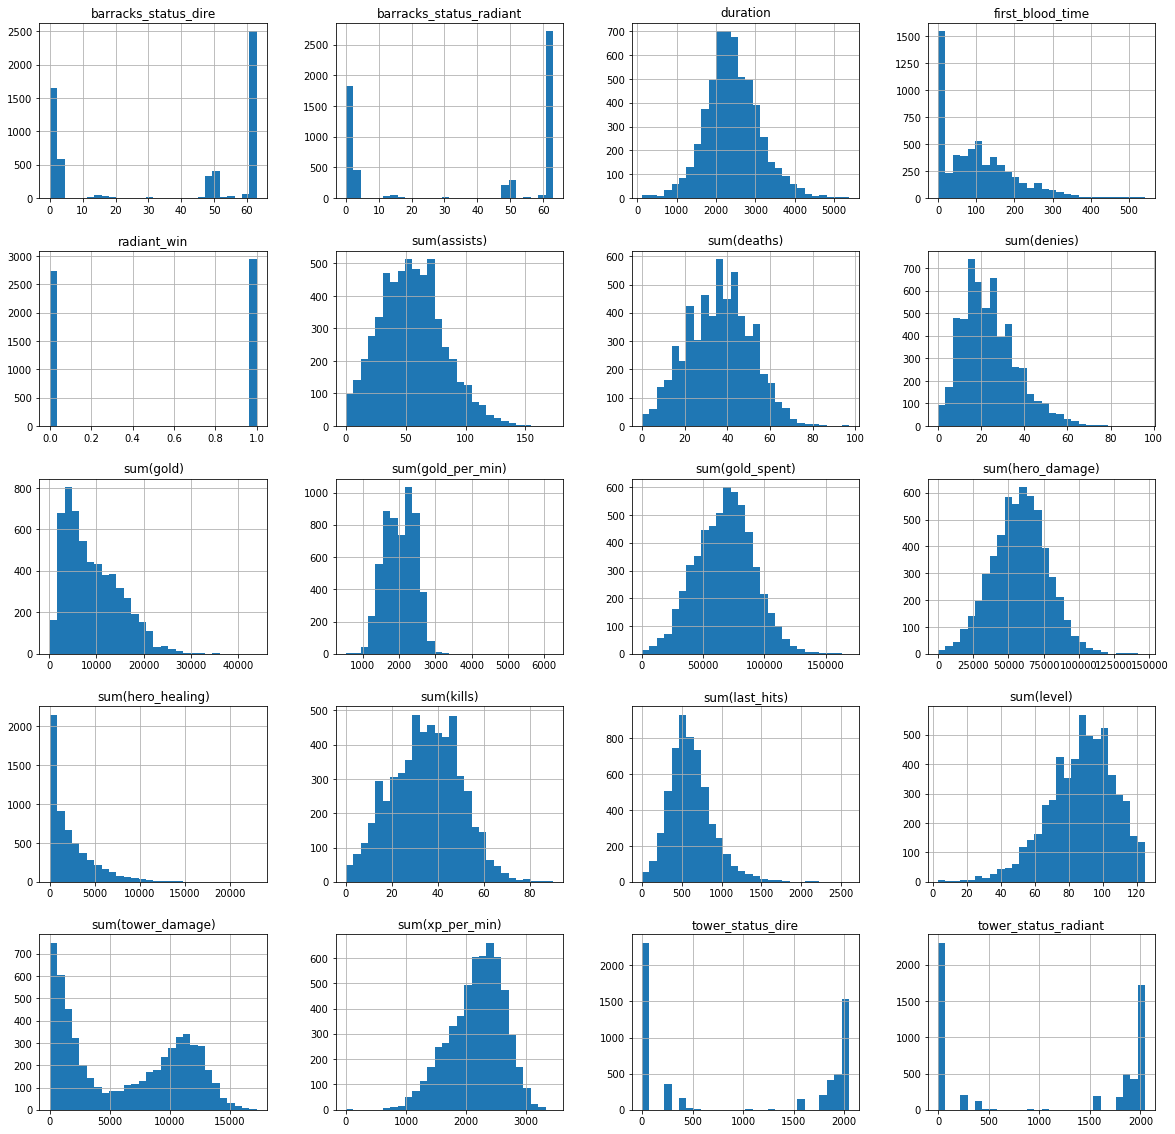

In [9]:
# Não é necessário visualizar o identificador das partidas
df_stats = df.drop(['match_id'], axis=1)

df_stats.hist(figsize=(20,20), bins=28)
plt.show()

Algumas das estatísticas é interessante ver em mais detalhe

### Distribuição das vitórias por time
Aqui podemos ver que a quantidade de vitórias por time é mais ou menos balanceada.

Text(0, 0.5, 'Quantidade de vitórias')

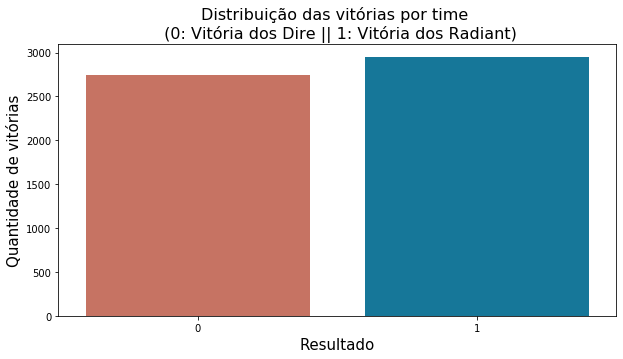

In [10]:
colors = ["#d66853", "#0081af"]
plt.figure(figsize=(10,5))
sns.countplot('radiant_win', data=df, palette=colors)
plt.title('Distribuição das vitórias por time \n (0: Vitória dos Dire || 1: Vitória dos Radiant)', fontsize=16)
plt.xlabel('Resultado', fontsize=15)
plt.ylabel('Quantidade de vitórias', fontsize=15)

### Histograma da duração das partidas

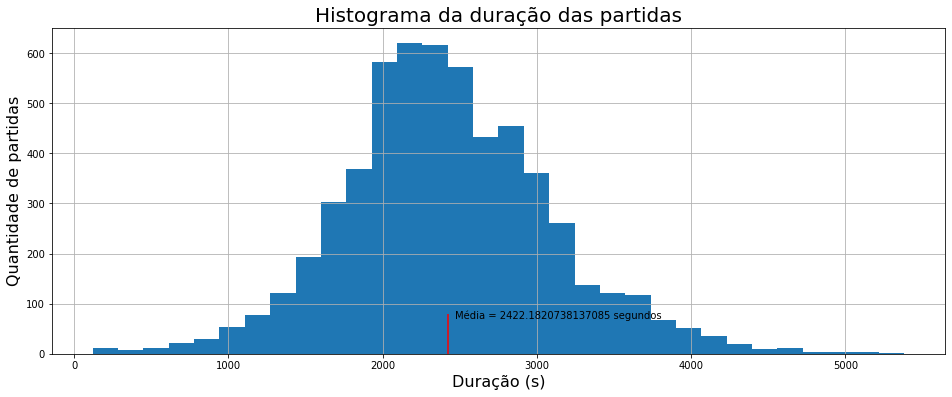

In [11]:
plt.xlabel('Duração (s)', fontsize=16)
plt.ylabel('Quantidade de partidas', fontsize=16)
plt.title('Histograma da duração das partidas', fontsize=20)

media = df['duration'].mean()

plt.vlines(media, 0, 80, color='red')
plt.text(media+50, 70, 'Média = '+str(media)+' segundos')

df['duration'].hist(figsize=(16,6),bins=32)

### Tempo em que acontece o first blood

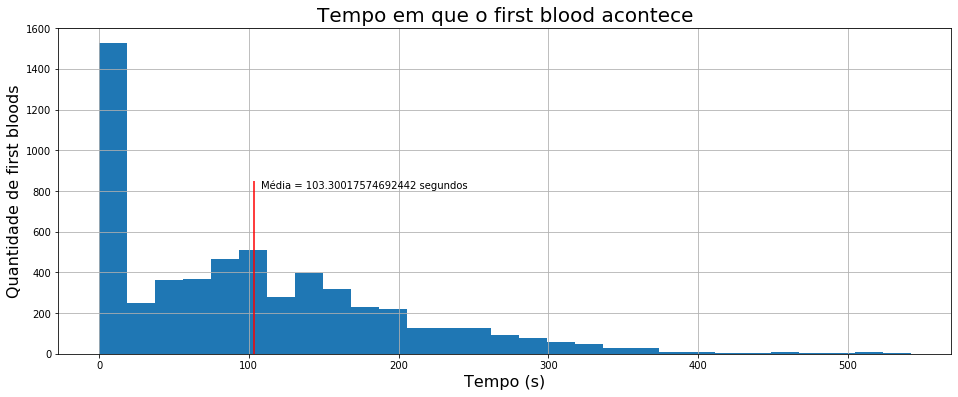

In [12]:
plt.xlabel('Tempo (s)', fontsize=16)
plt.ylabel('Quantidade de first bloods', fontsize=16)
plt.title('Tempo em que o first blood acontece', fontsize=20)

media = df['first_blood_time'].mean()

plt.vlines(media, 0, 850, color='red')
plt.text(media+5, 810, 'Média = '+str(media)+' segundos')

df['first_blood_time'].hist(figsize=(16,6),bins=29)

### Diferenças entre a vitória e derrota

Agora vamos ver como ficam distribuídas as estatísticas dependendo do resultado da partida (vitória e derrota). Separamos o dataset em dois, um apenas com as vitórias e outro apenas com as derrotas.



=================================================== Vitórias ===================================================


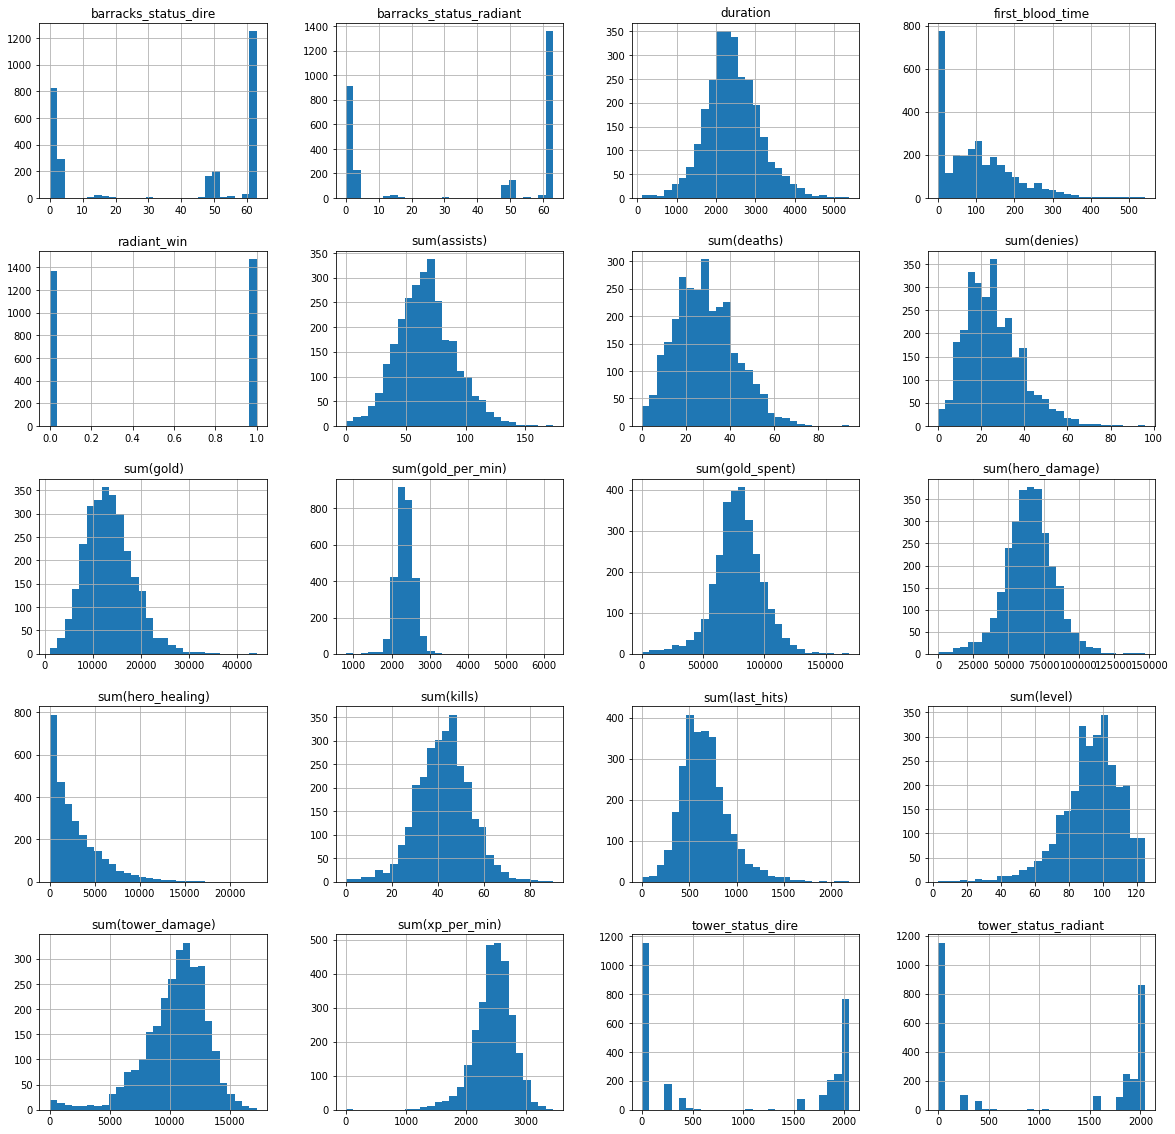



=================================================== Derrotas ===================================================


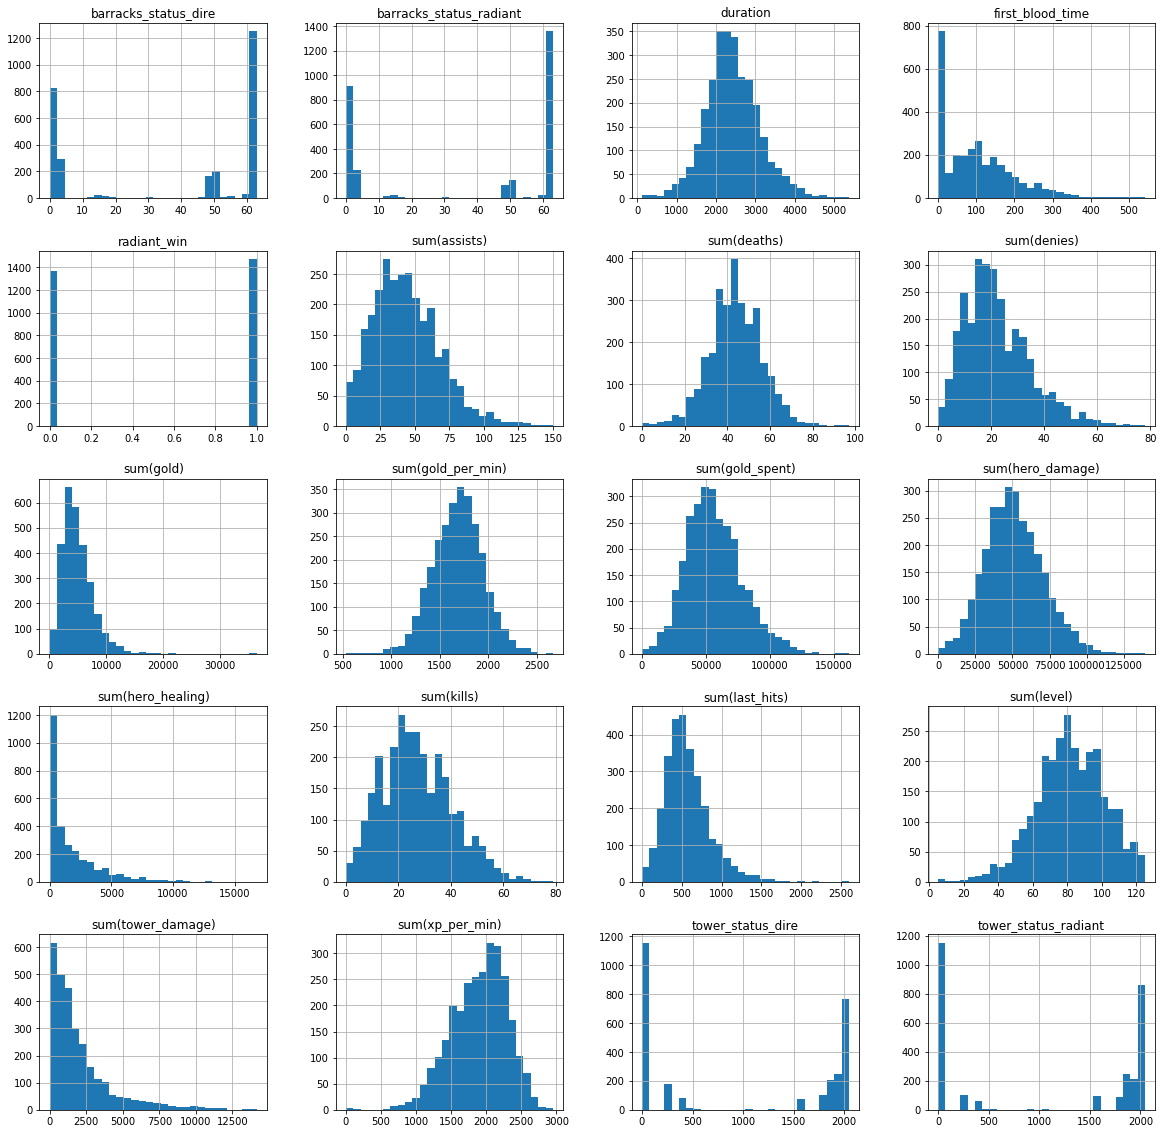

In [13]:
# Dataframe contendo apenas vitórias
df_wins = df[((df.radiant_win == 1) & (df.Team == 'Radiant')) | ((df.radiant_win == 0) & (df.Team == 'Dire'))]

# Dataframe contendo apenas derrotas
df_losses = df[((df.radiant_win == 0) & (df.Team == 'Radiant')) | ((df.radiant_win == 1) & (df.Team == 'Dire'))]

print("\n\n=================================================== Vitórias ===================================================")
df_wins.drop(['match_id'], axis=1).hist(figsize=(20,20), bins=28)
plt.show()
print("\n\n=================================================== Derrotas ===================================================")
df_losses.drop(['match_id'], axis=1).hist(figsize=(20,20), bins=28)
plt.show()

### Conclusão da análise exploratória

Agora que já fizemos uma análise prévia do que está contido no nosso dataset, podemos concluir que os dados mostram claramente várias tendências, que podem ser usadas para se fazer previsões ou classificações, principalmente na diferença entre os dados das vitórias e derrotas, o que significa que temos dados ótimos para realizar nossas análises.

# Vídeo no Youtube 5 minutos

In [14]:
from IPython.display import YouTubeVideo
# YouTubeVideo('2bCCk0xpurE')

In [1]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')


## Intervalo de Confiança
Para os testes seguintes o objetivo é garantir com porcentagem aceitavel que as afirmações feitas possam ser provadas utilizando uma amostras sufucientementes grandes, permitindo estimar com o menor viés os parâmetros desejados.

Objetivo: 
Provar, a partir dos dados disponíveis e de amostras da população com 95% de certeza eu a duração média das partidas está presente no intervalo entre 30 e 40 minutos.


In [16]:
match_durations = pd.read_sql_query(
'''
SELECT duration
FROM match
''', conn)

Primeiramente vamos categorizar os tempos de partida separando a população em:

*  Partidas com duração menor que 10 minutos
*  Partidas com duração menor que 20 minutos e maior que 10 minutos
*  Partidas com duração menor que 30 minutos e maior que 20 minutos
*  Partidas com duração menor que 40 minutos e maior que 30 minutos
*  Partidas com duração menor que 50 minutos e maior que 40 minutos
*  Partidas com duração menor que 60 minutos e maior que 50 minutos
*  Partidas com duração maior que 60 minutos

In [17]:
def classifyMatchDurations(match_durations):

  duration_classifier = [0] * 7
  for match_duration in match_durations.values:

    #Ignoramos os segundos
    match_duration = match_duration//60

    if(match_duration <= 10):
      duration_classifier[0] += 1
    elif(match_duration <= 20 and match_duration > 10):
      duration_classifier[1] += 1
    elif(match_duration <= 30 and match_duration > 20):
      duration_classifier[2] += 1
    elif(match_duration <= 40 and match_duration > 30):
      duration_classifier[3] += 1
    elif(match_duration <= 50 and match_duration > 40):
      duration_classifier[4] += 1
    elif(match_duration <= 60 and match_duration > 50):
      duration_classifier[5] += 1
    elif(match_duration > 60):
      duration_classifier[6] += 1
      
  duration_percentages = []
  for duration in duration_classifier:
    duration_percentages.append(round(duration/match_durations.size,2))
    
  return(duration_classifier, duration_percentages)

Para definirmos nosso intervalo de confiança, utilizaremos a técnica bootstrap de utilização da amostra para substituir a população como um todo.

In [18]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(100, replace=True)
    values[i] = sample.mean()//60
print(values)

[40. 37. 39. ... 40. 38. 36.]


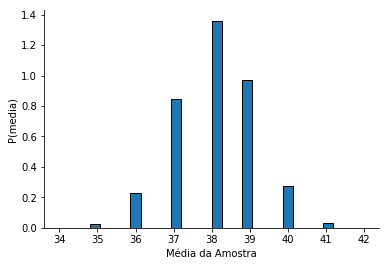

In [19]:
plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[37. 37. 37. ... 39. 37. 39.]


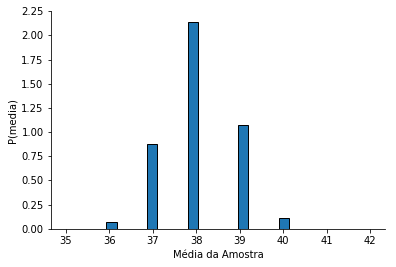

In [20]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(200, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[38. 39. 38. ... 39. 38. 38.]


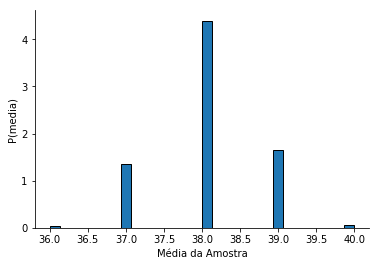

In [21]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(300, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[38. 38. 37. ... 38. 38. 38.]


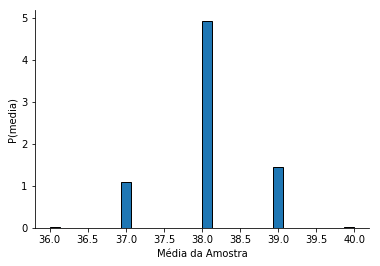

In [22]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(400, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[38. 38. 39. ... 38. 38. 38.]


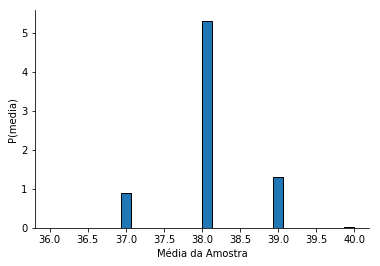

In [23]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(500, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[38. 37. 37. ... 37. 38. 38.]


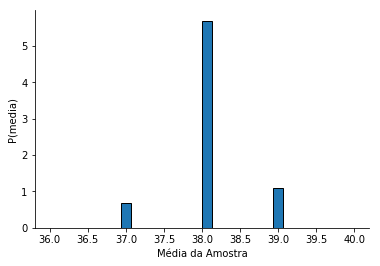

In [24]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(600, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

[38. 38. 38. ... 38. 38. 38.]


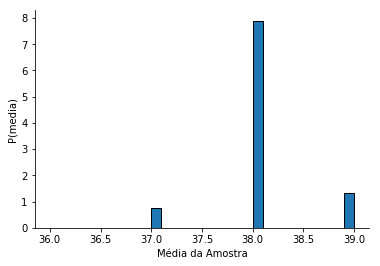

In [25]:
N = 10000
values = np.zeros(N)
for i in range(N):
    sample = match_durations.sample(700, replace=True)
    values[i] = sample.mean()//60
print(values)

plt.hist(values, bins=30, edgecolor='k', density=True)
plt.xlabel('Média da Amostra')
plt.ylabel('P(media)')

despine()

### Análise dos resultados
Utilizando um número n de amostras menor que o tamanho da população total (duração de todas as partidas do univeso estudado), fomos capases de plotar o histograma acima a partir dos seguintes passos.


*   Definimos o número de partidas que seriam analisadas **N**
*   Criamos uma amostra com o tamanho definido à partir da obtenção de elementos aleatórios dentro da população geral utilizando a função "sample".
*   Repetimos o passo anterior realizando a reposição dos elementos na amostra **N**

### Resultados

Observamos que para valores suficientemente grandes (próximos ao tamanho da população) os valores esperados se aproximam do intevalo analisado à partir da observação da população como um todo.

Ao analisarmos o histograma acima, podemos inferir que a média de duração das partidas tem valores próximos à 38 minutos, e utilizando as funções "percentile" podemos observar com 95% de confiança que a média está dentro do intervalo esperado.

E por fim, utilizando a média bruta da população, constatamos nossos cálculos.



In [26]:
np.percentile(values, 2.5)

37.0

In [27]:
np.percentile(values, 97.5)

39.0

In [28]:
duration_classifier, duration_percentage = classifyMatchDurations(match_durations)
print(duration_classifier)
print(duration_percentage)

[5, 33, 131, 310, 227, 66, 19]
[0.01, 0.04, 0.17, 0.39, 0.29, 0.08, 0.02]


In [29]:
np.mean(match_durations.values//60)

38.05183312262958

# Testes de Hipótese

#### Em uma partida, qual a distribuição de classes da equipe vencedora? Ou seja, a equipe vencedora é composta por qual porporção de heroes melee e ranged?

Para testar a hipótese nula de seleção uniforme, os testes a seguir definirão nossa amostragem acerca da distribuição das classes da equipe vencedora.

Buscaremos demonstrar que a seleção de uma classe dentro da equipe vencedora é proporcional a seleção da mesma dentro da população.

In [30]:
match_df = pd.read_sql_query(
'''
SELECT match_id, radiant_win
FROM match
''', conn)

match_df

match_id  radiant_win
0    2001309014            1
1    2001309152            0
2    2001309271            1
3    2001309334            1
4    2001309343            0
5    2001309528            0
6    2001309529            0
7    2001309531            0
8    2001309594            1
9    2001309614            0
10   2001309675            0
11   2001309700            0
12   2001309724            0
13   2001309900            0
14   2001309969            1
15   2001310085            0
16   2001310151            1
17   2001310343            1
18   2001310374            1
19   2001310382            0
20   2001310473            0
21   2001310590            0
22   2001310599            1
23   2001310791            0
24   2001310792            1
25   2001310796            1
26   2001310908            1
27   2001310910            1
28   2001310915            1
29   2001310916            0
..          ...          ...
761  2001378902            1
762  2001378906            1
763  2001378954            1
764  2001379127            1
765  2001379559            1
766  2001380507            0
767  2001380636            1
768  2001380919            0
769  2001381444            0
770  2001381719            0
771  2001381909            0
772  2001382266            0
773  2001382402            0
774  2001382715            1
775  2001382832            1
776  2001383285            1
777  2001383943            1
778  2001384423            1
779  2001384753            0
780  2001385642            0
781  2001386960            1
782  2001387185            1
783  2001387742            1
784  2001387982            1
785  2001389000            0
786  2001389600            1
787  2001390318            1
788  2001390473            0
789  2001394362            1
790  2001400694            1

[791 rows x 2 columns]

A seguir definimos as funções:


*  **total_variation:** Calculamos a TVD para mensuras as proporções entre os vetores de amostras e da população
*  **sample_proportion:** Define amostras das proporções de cada classe
*  **classifyAttackType:** Define através dos dados a proporção de cada classe dentro da partida à partir do cruzamento de dados com a equipe vencedora


In [43]:
def total_variation(p, q):
    return np.sum(np.abs(p - q)) / 2
  
def sample_proportion(pop_size, prop, n=10000):
  assert(prop >= 0)
  assert(prop <= 1)

  grupo = pop_size * prop
  resultados = np.zeros(n)
  for i in range(n):
      sample = np.random.randint(0, pop_size, 100)
      resultados[i] = np.sum(sample < grupo)
  return resultados

def classifyAttackType(match_df):
  class_distribution = [0] * 2
  melee_count = 0
  ranged_count = 0
  total_records = 0
  
  
  for match in match_df.values:
    p_query = "SELECT p.player_slot, h.attack_type FROM player p JOIN heroes h ON p.hero_id = h.hero_id WHERE player_match_id = {}".format(match[0])
    #print(p_query)

    player_df = pd.read_sql_query(p_query, conn)
    player_df

    #< 5 é radiant
    #> 5 é Dire

    RADIANT = 1
    TEAM_SIZE = 5


    winner_team = match[1]

    if winner_team == RADIANT:
      for player in player_df.values:
        if player[0] < 5:
          if player[1] == "Melee":
            melee_count += 1
          elif player[1] == "Ranged":
            ranged_count += 1
    elif winner_team != RADIANT:
      for player in player_df.values:
        if player[0] > 5:
          if player[1] == "Melee":
            melee_count += 1
          elif player[1] == "Ranged":
            ranged_count += 1

    class_distribution[0] = melee_count
    class_distribution[1] = ranged_count
  total_records = class_distribution[0] + class_distribution[1]
  return ([class_distribution[0]/(total_records), class_distribution[1]/(total_records)])

In [54]:
idx = ['Melee', 'Ranged']
df = pd.DataFrame(index=idx)
df['pop'] = classifyAttackType(match_df)

for n in [10,50,100,200,300,400,500,600,700]:
  sample = match_df.sample(n, replace=True)
  df['sample {}'.format(n)] = classifyAttackType(sample) 

df

pop  sample 10  sample 50  sample 100  sample 200  sample 300  \
Melee   0.494311       0.56      0.524       0.462       0.474    0.482667   
Ranged  0.505689       0.44      0.476       0.538       0.526    0.517333   

        sample 400  sample 500  sample 600  sample 700  
Melee       0.4945      0.4944    0.504667    0.503429  
Ranged      0.5055      0.5056    0.495333    0.496571

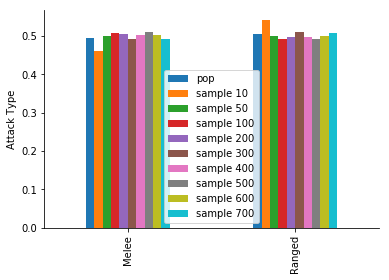

In [45]:
df.plot.bar()
plt.ylabel('Propopção')
plt.ylabel('Attack Type')
despine()

In [59]:
tv = total_variation(df['sample 100'], df['pop'])
tv

0.03231099873577753

In [47]:
total_variation(df['sample 100'], df['sample 400'])

0.006000000000000005

In [55]:
N = 10000
TVDS = np.zeros(shape=(10000, len(df.index)))
for i, g in enumerate(df.index):
    p = df.loc[g]['pop']
    TVDS[:, i] = sample_proportion(N, p) / 100

In [56]:
TVDS

array([[0.48, 0.54],
       [0.41, 0.54],
       [0.56, 0.45],
       ...,
       [0.47, 0.52],
       [0.55, 0.55],
       [0.51, 0.42]])

In [57]:
all_distances = []
for i in range(TVDS.shape[0]):
    all_distances.append(total_variation(df['pop'], TVDS[i]))

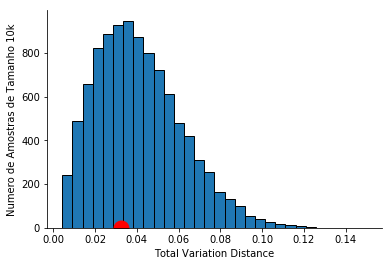

In [60]:
plt.hist(all_distances, bins=30, edgecolor='k')
plt.ylabel('Numero de Amostras de Tamanho 10k')
plt.xlabel('Total Variation Distance')
plt.plot([tv], [0], 'ro', ms=15)
despine()

In [40]:
np.percentile(all_distances, 2.5)

0.005689001264222476

In [41]:
np.percentile(all_distances, 97.5)

0.08931099873577755

### Resultados
Com um número suficientemente grande de amostras, podemos mostrar que nossa hipótese nula pode confirmar a seleção uniforme de dados demonstrando que a proporção de cada classe na equipe vencedora tem o formato aproximado de [0.4 +- 0.1, 0.4 +- 0.1]. 

Em outras palavras, a equipe vencedora, majoritariamente é composta por uma proporção próxima da uniformidade de heroes das duas classes.

Podemos ainda confirmar os dados a partir da análise do intervalo de confiança que nos mostra que com 95% de certeza, o TVD está entre 0.009 e 0.08.

## Regressão Linear:

Nessa consulta, o objetivo foi criar uma tabela com todos os jogadores de todas as partidas e identificar quais foram os "Last Hits" e os "Kills" de seus respectivos heróis.

Last hit é o termo utilizado para descrever quando o herói dá o golpe derradeiro em unidades NPC's (creeps) inimigos. Quando o last hit é desferido, o herói recebe uma pequena recompensa em gold no momento.

Kills armazena a quantidade de heróis que foram mortos pelo jogador até o fim do jogo.

Ambas são caratecrísticas importantes que podem oferecer vantagens para os jogadores no decorrer da partida.

A previsão que buscamos realizar utilizando regressão linear simples é:
"Prever qual o número de heroís mortos pelo jogador no fim do jogo observando o número de last hits totais do jogador na partida"

In [15]:
df_killsLastHits = pd.read_sql_query(
'''
SELECT hero_name "Hero Name", last_hits "Last hits", kills "Kills" 
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
)AS H
ON P.hero_id = H.id
''', conn)

df_killsLastHits

Hero Name  Last hits  Kills
0            Ember Spirit         51      8
1               Necrophos          4      1
2             Wraith King         52      1
3         Vengeful Spirit          7      2
4                 Slardar         65      1
5                    Lion         12      1
6        Templar Assassin         43      1
7                 Spectre         43      1
8           Shadow Shaman         10      1
9              Omniknight         59      2
10          Skywrath Mage         12      4
11             Gyrocopter        130      8
12                   Tusk         46      2
13                  Viper         67     10
14                Undying         44      7
15     Ancient Apparition         13      2
16                  Pudge         20      2
17                Invoker         52      1
18                   Lich         20      0
19             Juggernaut         88      3
20               Silencer         77      7
21            Drow Ranger         86      6
22                 Huskar         45     11
23              Anti-Mage        106      2
24             Gyrocopter        100     15
25            Wraith King         94     11
26               Silencer         76     13
27             Omniknight         33     11
28         Crystal Maiden         16     10
29             Juggernaut        138     33
...                   ...        ...    ...
28470       Faceless Void        101      2
28471       Skywrath Mage         22      1
28472                Lion         71     10
28473                Chen        122      2
28474        Nyx Assassin         73      9
28475       Troll Warlord        110     14
28476          Windranger         96      3
28477           Alchemist        144      3
28478           Necrophos         61      6
28479    Legion Commander        164      7
28480       Queen of Pain        125     10
28481  Ancient Apparition         19      2
28482          Windranger         97     18
28483                Doom        110     10
28484                Tusk         24      6
28485            Silencer         56      1
28486        Shadow Fiend        153     10
28487             Abaddon         19      0
28488           Dark Seer        115      3
28489              Dazzle         21      0
28490       Shadow Shaman         86      7
28491          Juggernaut        150      7
28492       Queen of Pain         82     22
28493       Night Stalker         59      4
28494                Tusk         24      9
28495      Crystal Maiden         27      2
28496           Alchemist        121      2
28497         Lifestealer        113      4
28498                Zeus         17      5
28499          Gyrocopter         64      4

[28500 rows x 3 columns]

In [16]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

Abaixo, para efeito de visualização, temos o gráfico plotado com as informações de kills e de last hits dos players

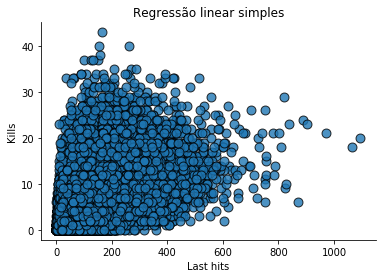

In [17]:
x = df_killsLastHits["Last hits"].values
y = df_killsLastHits["Kills"].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')
despine()

Supomos que existem constantes $\alpha$ (alfa) e $\beta$ (beta) tais que:
$$\hat{y}_i = \beta x_i + \alpha + \epsilon_i$$

O ideal é que possamos capturar o valor médio de $y_i$ para grupos de valores próximos em $x_i$. $\epsilon_i$ é um termo de erro (esperançosamente pequeno) que representa o fato de que existem outros fatores não explicados por este modelo simples.

Para qualquer escolha de alfa e beta teremos uma saída prevista para cada entrada $x_i$. Como sabemos a saída real $y_i$, podemos calcular o erro de cada par e computar o valor $\epsilon_i$. Quanto o menor for o valor de $\epsilon_i$, menor será a influência de outros fatores não explicados neste modelo.


In [18]:
def error(alpha, beta, x, y):
    model = beta * x + alpha
    return y - model

Somamos os erros quadrados:

In [19]:
def sum_of_squared_errors(alpha, beta, x, y):
    return (error(alpha, beta, x, y) ** 2).sum()

A escolha do alfa mostra que quando observamos o valor médio da variável independente $x$, podemos predizer o valor médio da variável dependente $y$.

A escolha de beta significa que quando o valor de entrada aumenta pelo desvio padrão de $x$, a previsão de $y$ aumenta pela correlação entre $x$ e $y$ multiplicada pelo desvio padrão de $y$ (correlationxy * np.std(y)). No caso em que $x$ e $y$ estão perfeitamente correlacionados, um aumento de um desvio padrão em $x$ resulta em um aumento de um desvio padrão de $y$ na predição. Quando eles são perfeitamente anti-correlacionados, o aumento em $x$ resulta em uma diminuição no valor da previsão. E quando a correlação é zero, o beta é zero, o que significa que as alterações em $x$ não afetam a previsão.

In [20]:
from scipy import stats as ss

def least_squares_fit(x, y):
    correlationxy = ss.pearsonr(x, y)[0]
    beta = correlationxy * np.std(y, ddof=1) / np.std(x, ddof=1)
    alpha = np.mean(y) - beta * np.mean(x)
    return alpha, beta

Cálculo do alpha e do beta.

Text(0.5, 1.0, 'Regressão linear simples')

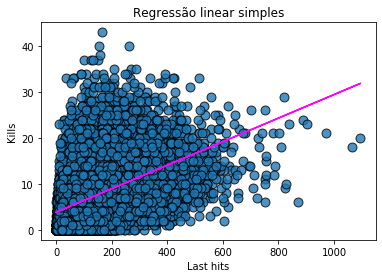

In [21]:
x = df_killsLastHits['Last hits'].values
y = df_killsLastHits['Kills'].values
alpha, beta = least_squares_fit(x, y)
y_model = beta * x + alpha
plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.plot(x, y_model, color='magenta')
plt.xlabel('Last hits')
plt.ylabel('Kills')
plt.title('Regressão linear simples')

In [22]:
alpha, beta

(3.8240645745671573, 0.025621588923095236)

Observando a equação "y_model = beta * x + alpha", e com os valores de alpha e de beta, podemos interpretar os dados e prever o quanto espera-se que os jogadores matem de heróis observando a quantidade de last hits totais dados por cada jogador na partida.

Por exemplo, caso o jogador não dê last hits, espera-se que ele mate, na média, aproximadamente 3.6151 heróis em uma partida, para chegar neste valor basta colocar beta = 0 na fórmula e pegar o valor resultante de y_model. Porém, se na partida ele der 300 last hits, espera-se que ele mate na média, aproximadamente, 8.0396 heróis, para chegar este valor basta fazer x = 300 e observar o valor resultante de y_model.

In [23]:
def total_sum_of_squares(y):
    return ((y - y.mean()) ** 2).sum()

def r_squared(alpha, beta, x, y):
    return 1.0 - (sum_of_squared_errors(alpha, beta, x, y) /
                  total_sum_of_squares(y))

Vamos agora calcular o $R^2$. Seu resultado deve ser no mínimo $0$ e no máximo $1$.

In [24]:
r_squared(alpha, beta, x, y)

0.21538066962769853

Quanto maior for o $R^2$, melhor o nosso modelo se ajusta aos dados. Neste modelo calculamos que o $R^2$ é $0.21$, o que nos mostra que o nosso modelo não está tão forte e que existem outros fatores em jogo.
Em baixo, calculamos a raiz de $R^2$ para encontrar a correlação.

In [25]:
r_squared(alpha, beta, x, y) ** 0.5

0.4640912298543235

Para efeito de comparação, utilizamos o Coeficiente de Correlação de Pearson.

In [26]:
ss.pearsonr(x, y)[0]

0.46409122985432333

-> Bootstrap na Regressão

A regressão foi realizada em uma amostra, ou seja, qualquer estatística que obtemos vêm com erros. Os coeficientes da nossa regressão: $\alpha$ e $\beta$ possuem erros. Além da correlação $r$ e do $R^2$. 
Para saber a variablidade de tais estimativas, usaremos Bootstrap. O código abaixo faz um Bootstrap de: $\alpha$, $\beta$ e $R^2$.


In [27]:
def bootstrap_regression(df, n=10000, size=None):
    if size is None:
        size = len(df)
    
    alphas = np.zeros(n)
    betas = np.zeros(n)
    rs = np.zeros(n)

    for i in range(n):
        sample = df.sample(size, replace=True)
        x = sample['Last hits'].values
        y = sample['Kills'].values
        alpha, beta = least_squares_fit(x, y)
    
        alphas[i] = alpha
        betas[i] = beta
        rs[i] = ss.pearsonr(x, y)[0] ** 2
    return alphas, betas, rs

In [28]:
alphas, betas, rs = bootstrap_regression(df_killsLastHits)

Plotando o gráfico de coluna para o alpha, temos:

3.823249834816079
3.7380910326427372 3.910990118463497


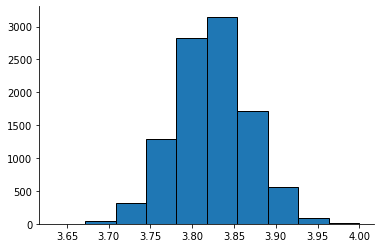

In [29]:
plt.hist(alphas, edgecolor='k')
lower = np.percentile(alphas, 2.5)
upper = np.percentile(alphas, 97.5)
despine()
print(alphas.mean())
print(lower, upper)

Plotando o gráfico de coluna para o beta, temos:

0.025627267289003088
0.024926614588703412 0.026208577659312594


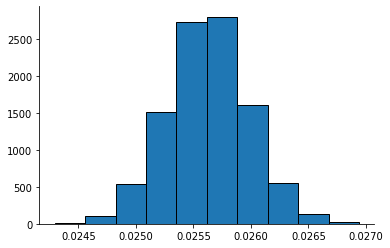

In [30]:
plt.hist(betas, edgecolor='k')
lower = np.percentile(betas, 2.5)
upper = np.percentile(betas, 95)
despine()
print(betas.mean())
print(lower, upper)

0.21543638145423266
0.2061844238567172 0.224979182702145


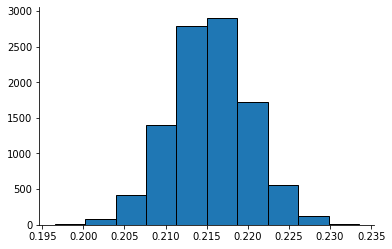

In [31]:
plt.hist(rs, edgecolor='k')
lower = np.percentile(rs, 2.5)
upper = np.percentile(rs, 97.5)
despine()
print(rs.mean())
print(lower, upper)

-> Aprendizado/classificação:

https://pt.wikipedia.org/wiki/Aprendizado_de_m%C3%A1quina

Aprendizado supervisionado: São apresentadas ao computador exemplos de entradas e saídas desejadas, fornecidas por um "professor". O objetivo é aprender uma regra geral que mapeia as entradas para as saídas.

Em classificação, entradas são divididas em duas ou mais classes, e o aprendiz deve produzir um modelo que vincula entradas não vistas a uma ou mais dessas classes (classificação multi-etiquetada). Isso é tipicamente abordado de forma supervisionada. A filtragem de spam é um exemplo de classificação, em que as entradas são as mensagens de emails (ou outros) e as classes são "spam" ou "não spam".

http://www.cienciaedados.com/conceitos-fundamentais-de-machine-learning/

É o termo usado sempre que o programa é “treinado” sobre um conjunto de dados pré-definido. Baseado no treinamento com os dados pré-definidos, o programa pode tomar decisões precisas quando recebe novos dados. Exemplo: Pode-se usar um conjunto de dados de recursos humanos para treinamento da Machine Learning, que tenha tweets marcados como positivos, negativos e neutros e assim treinar um classificador de análise de sentimento.

A classificação é uma sub-categoria de aprendizagem supervisionada. Classificação é o processo de tomar algum tipo de entrada e atribuir um rótulo a ela. Sistemas de classificação são usados ​​geralmente quando as previsões são de natureza distinta, ou seja, um simples “sim ou não”. Exemplo: Mapeamento de uma imagem de uma pessoa e classificação como masculino ou feminino.

KNN

Na situação geral, temos alguns pontos de dados e temos um conjunto de rótulos correspondente. Os rótulos podem ser True e False, indicando se cada entrada satisfaz alguma condição como "é spam?" Ou "é venenoso?" Ou "seria agradável assistir". Ou podem ser categorias, como a classificação indicativa de filmes (G, PG, PG-13, R, NC-17). Ou eles poderiam ser os nomes dos candidatos presidenciais. Ou poderiam ser linguagens de programação favoritas.

Tentar prever quais os itens que os jogadores terminarão a partida
Observando como atributo primário, tipos de ataque, level

-> KNN tridimensional: Kills x Deaths x Assists

A ideia aqui foi plotar um gráfico tridimensional de eixos Kills, Deaths e Assists dos jogadores de todas as partidas. Com o gráfico plotado, a ideia é através dos vizinhos mais próximos, tentar prever se o jogador saiu vitorioso ou não de uma partida.

In [32]:
df_prediction = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', kills 'Kills', assists 'Assists', deaths 'Deaths', player_slot 'Team', radiant_win 'Resultado'
FROM match AS M
INNER JOIN(
    SELECT *
    FROM player AS P
    INNER JOIN(
        SELECT hero_id id, localized_name hero_name
        FROM heroes
    ) AS H
    ON P.hero_id = H.id
) AS K
ON M.match_id = K.player_match_id
''', conn)

df_prediction

Hero Name  Kills  Assists  Deaths  Team  Resultado
0            Ember Spirit      8        4       0     0          1
1               Necrophos      1        7       1     1          1
2             Wraith King      1        4       2     2          1
3         Vengeful Spirit      2        2       2     3          1
4                 Slardar      1        1       1     4          1
5                    Lion      1        3       5   128          1
6        Templar Assassin      1        0       4   129          1
7                 Spectre      1        3       1   130          1
8           Shadow Shaman      1        3       3   131          1
9              Omniknight      2        0       1   132          1
10          Skywrath Mage      4        6       3     0          1
11             Gyrocopter      8        4       0     1          1
12                   Tusk      2       15       5     2          1
13                  Viper     10        3       0     3          1
14                Undying      7        7       2     4          1
15     Ancient Apparition      2        1       7   128          1
16                  Pudge      2        3       8   129          1
17                Invoker      1        0       3   130          1
18                   Lich      0        3      11   131          1
19             Juggernaut      3        2       3   132          1
20               Silencer      7        3       2   128          0
21            Drow Ranger      6       11       2   129          0
22                 Huskar     11        7       4   130          0
23              Anti-Mage      2        3       0   131          0
24             Gyrocopter     15       15       2   132          0
25            Wraith King     11       14       0     0          1
26               Silencer     13       30       0     1          1
27             Omniknight     11       17       0     2          1
28         Crystal Maiden     10       29       0     3          1
29             Juggernaut     33       22       2     4          1
...                   ...    ...      ...     ...   ...        ...
28470       Faceless Void      2       10       6     0          0
28471       Skywrath Mage      1        3       9     1          0
28472                Lion     10        5       7     2          0
28473                Chen      2        5       6     3          0
28474        Nyx Assassin      9        2       6     4          0
28475       Troll Warlord     14       11       6   128          0
28476          Windranger      3        8       6   129          0
28477           Alchemist      3        4       4   130          0
28478           Necrophos      6       17       6   131          0
28479    Legion Commander      7        9       4   132          0
28480       Queen of Pain     10       19       4     0          1
28481  Ancient Apparition      2       20       2     1          1
28482          Windranger     18       20       1     2          1
28483                Doom     10       16       4     3          1
28484                Tusk      6       16       5     4          1
28485            Silencer      1        4      11   128          1
28486        Shadow Fiend     10        3      10   129          1
28487             Abaddon      0        9       7   130          1
28488           Dark Seer      3        5       9   131          1
28489              Dazzle      0        5       9   132          1
28490       Shadow Shaman      7       15       6     0          1
28491          Juggernaut      7       10       2     1          1
28492       Queen of Pain     22       16       4     2          1
28493       Night Stalker      4       11       3     3          1
28494                Tusk      9       23       4     4          1
28495      Crystal Maiden      2        8      12   128          1
28496           Alchemist      2        5       9   129          1
28497         Lifestealer      4        4       6   130        

Text(0.5, 0.92, 'KDA em três dimensões')

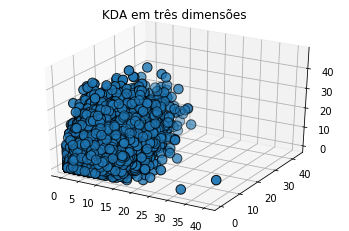

In [33]:
xpre = df_prediction["Deaths"].values
ypre = df_prediction["Kills"].values
zpre = df_prediction["Assists"].values

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xpre, ypre, zpre, s=90, edgecolors='k')
plt.title("KDA em três dimensões")

-> KNN: Número de jogadores x KDA

KDA = $(kills + assists)/MAX(1,deaths).$

A ideia é calcular o KDA de todos os jogadores de todos os jogos, e a partir do gráfico bidimensional gerado entre KDA e o índice de cada jogador, utilizar o algoritmo de vizinho mais próximo (KNN) para tentar prever se o jogador com determinado KDA saiu vencedor em sua partida.

In [34]:
df_kda_pre = pd.read_sql_query(
'''
SELECT hero_name 'Hero Name', kills Kills, assists Assists, deaths Deaths, (CAST(kills AS float)+CAST(assists AS float))/CAST(MAX(1, deaths) AS float) "KDA Ratio"
FROM player AS P
INNER JOIN(
    SELECT hero_id id, localized_name hero_name
    FROM heroes
) AS H
ON P.hero_id = H.id
''', conn)

df_kda_pre

Hero Name  Kills  Assists  Deaths  KDA Ratio
0            Ember Spirit      8        4       0  12.000000
1               Necrophos      1        7       1   8.000000
2             Wraith King      1        4       2   2.500000
3         Vengeful Spirit      2        2       2   2.000000
4                 Slardar      1        1       1   2.000000
5                    Lion      1        3       5   0.800000
6        Templar Assassin      1        0       4   0.250000
7                 Spectre      1        3       1   4.000000
8           Shadow Shaman      1        3       3   1.333333
9              Omniknight      2        0       1   2.000000
10          Skywrath Mage      4        6       3   3.333333
11             Gyrocopter      8        4       0  12.000000
12                   Tusk      2       15       5   3.400000
13                  Viper     10        3       0  13.000000
14                Undying      7        7       2   7.000000
15     Ancient Apparition      2        1       7   0.428571
16                  Pudge      2        3       8   0.625000
17                Invoker      1        0       3   0.333333
18                   Lich      0        3      11   0.272727
19             Juggernaut      3        2       3   1.666667
20               Silencer      7        3       2   5.000000
21            Drow Ranger      6       11       2   8.500000
22                 Huskar     11        7       4   4.500000
23              Anti-Mage      2        3       0   5.000000
24             Gyrocopter     15       15       2  15.000000
25            Wraith King     11       14       0  25.000000
26               Silencer     13       30       0  43.000000
27             Omniknight     11       17       0  28.000000
28         Crystal Maiden     10       29       0  39.000000
29             Juggernaut     33       22       2  27.500000
...                   ...    ...      ...     ...        ...
28470       Faceless Void      2       10       6   2.000000
28471       Skywrath Mage      1        3       9   0.444444
28472                Lion     10        5       7   2.142857
28473                Chen      2        5       6   1.166667
28474        Nyx Assassin      9        2       6   1.833333
28475       Troll Warlord     14       11       6   4.166667
28476          Windranger      3        8       6   1.833333
28477           Alchemist      3        4       4   1.750000
28478           Necrophos      6       17       6   3.833333
28479    Legion Commander      7        9       4   4.000000
28480       Queen of Pain     10       19       4   7.250000
28481  Ancient Apparition      2       20       2  11.000000
28482          Windranger     18       20       1  38.000000
28483                Doom     10       16       4   6.500000
28484                Tusk      6       16       5   4.400000
28485            Silencer      1        4      11   0.454545
28486        Shadow Fiend     10        3      10   1.300000
28487             Abaddon      0        9       7   1.285714
28488           Dark Seer      3        5       9   0.888889
28489              Dazzle      0        5       9   0.555556
28490       Shadow Shaman      7       15       6   3.666667
28491          Juggernaut      7       10       2   8.500000
28492       Queen of Pain     22       16       4   9.500000
28493       Night Stalker      4       11       3   5.000000
28494                Tusk      9       23       4   8.000000
28495      Crystal Maiden      2        8      12   0.833333
28496           Alchemist      2        5       9   0.777778
28497         Lifestealer      4        4       6   1.333333
28498                Zeus      5        8      13   1.000000
28499          Gyrocopter      4       11      10   1.500000

[28500 rows x 5 columns]

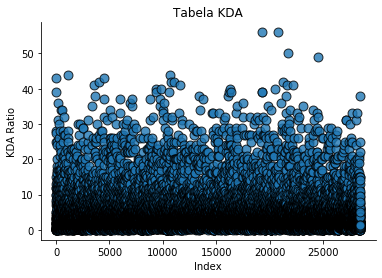

In [35]:
x_kda_pre = df_kda_pre.index
y_kda_pre = df_kda_pre["KDA Ratio"].values

plt.scatter(x_kda_pre, y_kda_pre, alpha=0.8, edgecolors='k', s=80)
plt.xlabel('Index')
plt.ylabel('KDA Ratio')
plt.title('Tabela KDA')
despine()